In [1]:
import pandas as pd
import numpy as np
import timeit
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
#import plotly.graph_objs as go
%matplotlib inline

In [2]:
from pandas_datareader import data as pdr

/Users/reejungkim/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
date_end = dt.datetime.today()
date_start = date_end - dt.timedelta(100)

In [4]:
date_end, date_start

(datetime.datetime(2020, 6, 24, 22, 13, 41, 846027),
 datetime.datetime(2020, 3, 16, 22, 13, 41, 846027))

In [5]:
df = pdr.DataReader("AAPL", 'yahoo', date_start, date_end).reset_index()

In [6]:
df = df.loc[df['Date'].notnull()]

In [7]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-03-17,257.609985,238.399994,247.509995,252.860001,81014000.0,252.177368
1,2020-03-18,250.000000,237.119995,239.770004,246.669998,75058400.0,246.004074
2,2020-03-19,252.839996,242.610001,247.389999,244.779999,67964300.0,244.119171
3,2020-03-20,251.830002,228.000000,247.179993,229.240005,100423300.0,228.621140
4,2020-03-23,228.500000,212.610001,228.080002,224.369995,84188200.0,223.764267
...,...,...,...,...,...,...,...
65,2020-06-18,353.450012,349.220001,351.410004,351.730011,24205100.0,351.730011
66,2020-06-19,356.559998,345.149994,354.640015,349.720001,66119000.0,349.720001
67,2020-06-22,359.459991,351.149994,351.339996,358.869995,33861300.0,358.869995
68,2020-06-23,372.380005,362.269989,364.000000,366.529999,52914600.0,366.529999


df = df.reset_index(drop=True)

df.groupby(['Symbol']).describe().transpose()

df_Org = df

# Forecasting closing prices using Tensorflow

In [8]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
le = preprocessing.LabelEncoder()

In [9]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [10]:
df['Date encoded'] = le.fit_transform(df['Date'])

In [11]:
df.shape

(70, 8)

In [12]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'Date encoded'],
      dtype='object')

In [13]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,Date encoded
0,2020-03-17,257.609985,238.399994,247.509995,252.860001,81014000.0,252.177368,0
1,2020-03-18,250.000000,237.119995,239.770004,246.669998,75058400.0,246.004074,1
2,2020-03-19,252.839996,242.610001,247.389999,244.779999,67964300.0,244.119171,2
3,2020-03-20,251.830002,228.000000,247.179993,229.240005,100423300.0,228.621140,3
4,2020-03-23,228.500000,212.610001,228.080002,224.369995,84188200.0,223.764267,4
...,...,...,...,...,...,...,...,...
65,2020-06-18,353.450012,349.220001,351.410004,351.730011,24205100.0,351.730011,65
66,2020-06-19,356.559998,345.149994,354.640015,349.720001,66119000.0,349.720001,66
67,2020-06-22,359.459991,351.149994,351.339996,358.869995,33861300.0,358.869995,67
68,2020-06-23,372.380005,362.269989,364.000000,366.529999,52914600.0,366.529999,68


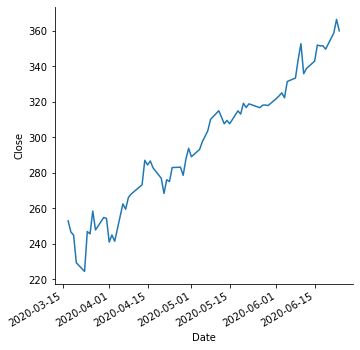

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x='Date', y='Close', kind='line', data=df).fig.autofmt_xdate()

In [15]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,Date encoded
0,2020-03-17,257.609985,238.399994,247.509995,252.860001,81014000.0,252.177368,0
1,2020-03-18,250.000000,237.119995,239.770004,246.669998,75058400.0,246.004074,1
2,2020-03-19,252.839996,242.610001,247.389999,244.779999,67964300.0,244.119171,2
3,2020-03-20,251.830002,228.000000,247.179993,229.240005,100423300.0,228.621140,3
4,2020-03-23,228.500000,212.610001,228.080002,224.369995,84188200.0,223.764267,4
...,...,...,...,...,...,...,...,...
65,2020-06-18,353.450012,349.220001,351.410004,351.730011,24205100.0,351.730011,65
66,2020-06-19,356.559998,345.149994,354.640015,349.720001,66119000.0,349.720001,66
67,2020-06-22,359.459991,351.149994,351.339996,358.869995,33861300.0,358.869995,67
68,2020-06-23,372.380005,362.269989,364.000000,366.529999,52914600.0,366.529999,68


In [16]:
df.values[:30, 7]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=object)

In [19]:
df.values[10:, 7]

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69], dtype=object)

In [43]:
x_train, y_train = df.values[:30, 7], df.values[:30, 4]
x_test, y_test = df.values[-30:, 7], df.values[-30:, 4]

In [44]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((30,), (30,), (30,), (30,))

In [46]:
x_test

array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69], dtype=object)

In [47]:
from keras.models import Sequential
from keras.layers import Dense

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
#import lstm, time

model = Sequential()

model.add(Dense(16, activation='sigmoid', input_shape=(1,)))
model.add(Dense(1, activation='linear'))

model.summary()

model.compile(optimizer='sgd', loss='mse', metrics=['mape']) 
#sgd - stochastic gradient descent
#mse - mean square error
#mape - mean absolute percentage error

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=.2)

history = model.fit(x_train, y_train, batch_size=4, epochs=10, validation_data=(x_valid, y_valid))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
Train on 24 samples, validate on 6 samples
Epoch 1/10
24/24 [==============================] - 0s 15ms/step - loss: 38039.7422 - mape: 71.5903 - val_loss: 8391.3193 - val_mape: 32.9775
Epoch 2/10
24/24 [==============================] - 0s 497us/step - loss: 2446.2396 - mape: 16.5045 - val_loss: 704.8790 - val_mape: 9.1398
Epoch 3/10
24/24 [==============================] - 0s 554us/step - loss: 358.1468 - mape: 6.1174 - val_loss: 534.6354 - val_mape: 8.1734
Epoch 4/10
24/24 [==============================] - 0s 45

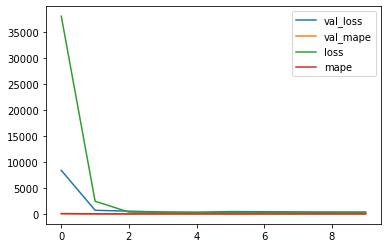

In [48]:
for name, value in history.history.items():
    plt.plot(value, label=name)
plt.legend()
plt.show()

In [49]:
## evaluate model

results = model.evaluate(x_test, y_test)

print('Loss: {:.6f} - MAPE: {:.6f}'.format(*results))

30/30 [==============================] - 0s 30us/step
Loss: 5291.830078 - MAPE: 21.111544


In [50]:
test_pred = model.predict(x_test)

test_pred = np.squeeze(test_pred)

test_pred

array([260.73047, 260.73047, 260.73047, 260.73047, 260.73047, 260.73047,
       260.73047, 260.73047, 260.73047, 260.73047, 260.73047, 260.73047,
       260.73047, 260.73047, 260.73047, 260.73047, 260.73047, 260.73047,
       260.73047, 260.73047, 260.73047, 260.73047, 260.73047, 260.73047,
       260.73047, 260.73047, 260.73047, 260.73047, 260.73047, 260.73047],
      dtype=float32)

In [51]:
test_pred = model.predict(x_test)

test_pred = np.squeeze(test_pred)

test_pred

array([260.73047, 260.73047, 260.73047, 260.73047, 260.73047, 260.73047,
       260.73047, 260.73047, 260.73047, 260.73047, 260.73047, 260.73047,
       260.73047, 260.73047, 260.73047, 260.73047, 260.73047, 260.73047,
       260.73047, 260.73047, 260.73047, 260.73047, 260.73047, 260.73047,
       260.73047, 260.73047, 260.73047, 260.73047, 260.73047, 260.73047],
      dtype=float32)

In [52]:
y_test

array([307.6499938964844, 309.5400085449219, 307.7099914550781,
       314.9599914550781, 313.1400146484375, 319.2300109863281,
       316.8500061035156, 318.8900146484375, 316.7300109863281,
       318.1099853515625, 318.25, 317.94000244140625, 321.8500061035156,
       323.3399963378906, 325.1199951171875, 322.32000732421875, 331.5,
       333.4599914550781, 343.989990234375, 352.8399963378906,
       335.8999938964844, 338.79998779296875, 342.989990234375,
       352.0799865722656, 351.5899963378906, 351.7300109863281,
       349.7200012207031, 358.8699951171875, 366.5299987792969,
       360.05999755859375], dtype=object)

In [53]:
for pred, true in zip(test_pred, y_test):
    print('Pred: {:.6f} - True: {:.6f}'.format(pred,true))

Pred: 260.730469 - True: 307.649994
Pred: 260.730469 - True: 309.540009
Pred: 260.730469 - True: 307.709991
Pred: 260.730469 - True: 314.959991
Pred: 260.730469 - True: 313.140015
Pred: 260.730469 - True: 319.230011
Pred: 260.730469 - True: 316.850006
Pred: 260.730469 - True: 318.890015
Pred: 260.730469 - True: 316.730011
Pred: 260.730469 - True: 318.109985
Pred: 260.730469 - True: 318.250000
Pred: 260.730469 - True: 317.940002
Pred: 260.730469 - True: 321.850006
Pred: 260.730469 - True: 323.339996
Pred: 260.730469 - True: 325.119995
Pred: 260.730469 - True: 322.320007
Pred: 260.730469 - True: 331.500000
Pred: 260.730469 - True: 333.459991
Pred: 260.730469 - True: 343.989990
Pred: 260.730469 - True: 352.839996
Pred: 260.730469 - True: 335.899994
Pred: 260.730469 - True: 338.799988
Pred: 260.730469 - True: 342.989990
Pred: 260.730469 - True: 352.079987
Pred: 260.730469 - True: 351.589996
Pred: 260.730469 - True: 351.730011
Pred: 260.730469 - True: 349.720001
Pred: 260.730469 - True: 358

Save model

In [54]:
model_path = 'model.h5'
model.save(model_path)

from keras.models import load_model

loaded_model = load_model(model_path)

In [55]:
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [56]:
y_test

array([307.6499938964844, 309.5400085449219, 307.7099914550781,
       314.9599914550781, 313.1400146484375, 319.2300109863281,
       316.8500061035156, 318.8900146484375, 316.7300109863281,
       318.1099853515625, 318.25, 317.94000244140625, 321.8500061035156,
       323.3399963378906, 325.1199951171875, 322.32000732421875, 331.5,
       333.4599914550781, 343.989990234375, 352.8399963378906,
       335.8999938964844, 338.79998779296875, 342.989990234375,
       352.0799865722656, 351.5899963378906, 351.7300109863281,
       349.7200012207031, 358.8699951171875, 366.5299987792969,
       360.05999755859375], dtype=object)

In [57]:
test_pred

array([260.73047, 260.73047, 260.73047, 260.73047, 260.73047, 260.73047,
       260.73047, 260.73047, 260.73047, 260.73047, 260.73047, 260.73047,
       260.73047, 260.73047, 260.73047, 260.73047, 260.73047, 260.73047,
       260.73047, 260.73047, 260.73047, 260.73047, 260.73047, 260.73047,
       260.73047, 260.73047, 260.73047, 260.73047, 260.73047, 260.73047],
      dtype=float32)

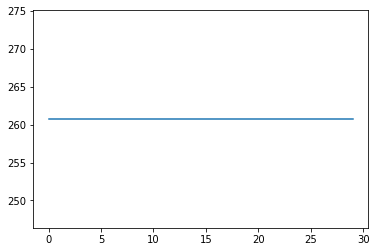

In [58]:
plt.figure()
plt.plot(test_pred)

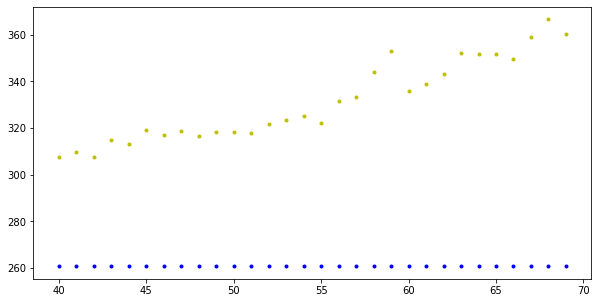

In [59]:
plt.figure(figsize=(10, 5))
plt.plot(x_test, y_test, '.y', x_test, test_pred, '.b')
plt.show()

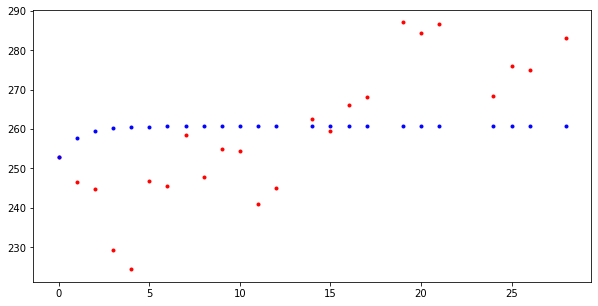

In [60]:
train_pred = model.predict(x_train)
train_pred = np.squeeze(train_pred)

plt.figure(figsize=(10, 5))
plt.plot(x_train, y_train, '.r', x_train, train_pred, '.b')
plt.show()

In [61]:
train_pred

array([260.7275 , 260.72174, 260.7303 , 259.3759 , 260.5839 , 260.73044,
       260.73013, 260.70447, 257.62503, 260.71542, 260.68512, 260.7254 ,
       260.7299 , 260.73047, 260.73047, 260.73047, 260.72946, 260.14105,
       260.65012, 260.73047, 260.44855, 252.8459 , 260.73047, 260.7304 ],
      dtype=float32)

In [62]:
test_pred

array([260.73047, 260.73047, 260.73047, 260.73047, 260.73047, 260.73047,
       260.73047, 260.73047, 260.73047, 260.73047, 260.73047, 260.73047,
       260.73047, 260.73047, 260.73047, 260.73047, 260.73047, 260.73047,
       260.73047, 260.73047, 260.73047, 260.73047, 260.73047, 260.73047,
       260.73047, 260.73047, 260.73047, 260.73047, 260.73047, 260.73047],
      dtype=float32)

In [63]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,Date encoded
0,2020-03-17,257.609985,238.399994,247.509995,252.860001,81014000.0,252.177368,0
1,2020-03-18,250.000000,237.119995,239.770004,246.669998,75058400.0,246.004074,1
2,2020-03-19,252.839996,242.610001,247.389999,244.779999,67964300.0,244.119171,2
3,2020-03-20,251.830002,228.000000,247.179993,229.240005,100423300.0,228.621140,3
4,2020-03-23,228.500000,212.610001,228.080002,224.369995,84188200.0,223.764267,4
...,...,...,...,...,...,...,...,...
65,2020-06-18,353.450012,349.220001,351.410004,351.730011,24205100.0,351.730011,65
66,2020-06-19,356.559998,345.149994,354.640015,349.720001,66119000.0,349.720001,66
67,2020-06-22,359.459991,351.149994,351.339996,358.869995,33861300.0,358.869995,67
68,2020-06-23,372.380005,362.269989,364.000000,366.529999,52914600.0,366.529999,68
